<a href="https://colab.research.google.com/github/Jakondo/Python-for-DL-and-CV/blob/master/Ch7_Image_Recognition_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 7: Image Recognition - PyTorch

---



In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

#Train and Validation

In [0]:
transform = transforms.Compose([transforms.Resize((28, 28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

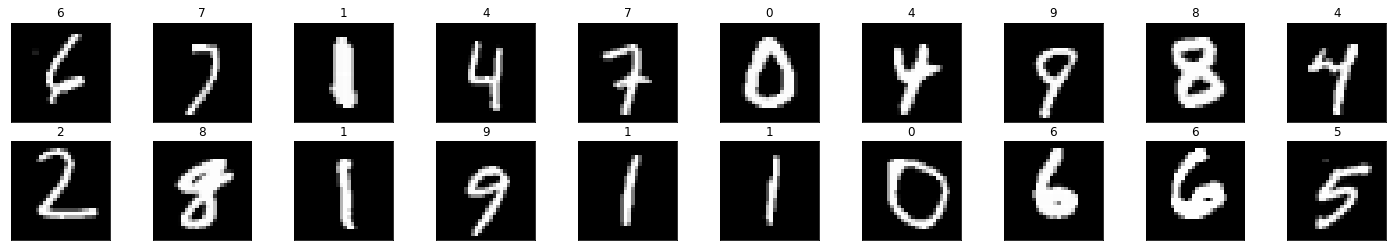

In [0]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
    
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [0]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [0]:
epochs = 12
loss_hist = []
correct_hist = []
val_loss_hist = []
val_cor_hist = []

for e in range(epochs):
  run_loss = 0.0
  run_correct = 0.0
  val_run_loss = 0.0
  val_run_cor = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)    
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    run_correct += torch.sum(preds == labels.data)    
    run_loss += loss.item()
    
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)    
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_run_cor += torch.sum(val_preds == val_labels.data)    
        val_run_loss += val_loss.item()
      
    epoch_loss = run_loss/len(training_loader)
    epoch_acc = run_correct.float()/len(training_loader)
    loss_hist.append(epoch_loss)
    correct_hist.append(epoch_acc)
    
    val_epoch_loss = val_run_loss/len(validation_loader)
    val_epoch_acc = val_run_cor.float()/len(validation_loader)
    val_loss_hist.append(val_epoch_loss)
    val_cor_hist.append(val_epoch_acc)
    
    print('epoch: ', (e+1))    
    print('training loss: {:.4f}, accuracy {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, accuracy {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))

epoch:  1
training loss: 0.1691, accuracy 95.3450
validation loss: 0.1880, accuracy 95.3700
epoch:  2
training loss: 0.1666, accuracy 95.4133
validation loss: 0.1869, accuracy 95.3500
epoch:  3
training loss: 0.1581, accuracy 95.6483
validation loss: 0.1837, accuracy 94.8300
epoch:  4
training loss: 0.1544, accuracy 95.6850
validation loss: 0.2269, accuracy 94.3500
epoch:  5
training loss: 0.1580, accuracy 95.6383
validation loss: 0.2060, accuracy 94.6200
epoch:  6
training loss: 0.1623, accuracy 95.6633
validation loss: 0.1877, accuracy 95.4600
epoch:  7
training loss: 0.1506, accuracy 95.8467
validation loss: 0.1888, accuracy 95.3600
epoch:  8
training loss: 0.1561, accuracy 95.7617
validation loss: 0.1739, accuracy 95.6000
epoch:  9
training loss: 0.1591, accuracy 95.6367
validation loss: 0.2148, accuracy 94.7000
epoch:  10
training loss: 0.1514, accuracy 95.8383
validation loss: 0.1709, accuracy 95.8700
epoch:  11
training loss: 0.1489, accuracy 95.9617
validation loss: 0.2154, acc

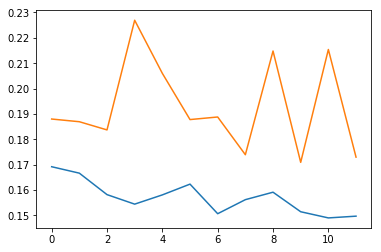

In [0]:
plt.plot(loss_hist, label='Training loss')
plt.plot(val_loss_hist, label='Validation Loss');

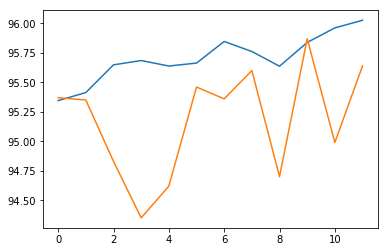

In [0]:
plt.plot(correct_hist, label='Correct Score')
plt.plot(val_cor_hist, label='Validation correct score');

#Test

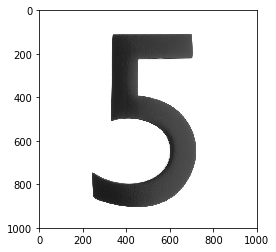

In [0]:
import requests
import PIL.ImageOps
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img);

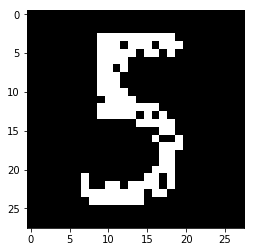

In [0]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [0]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


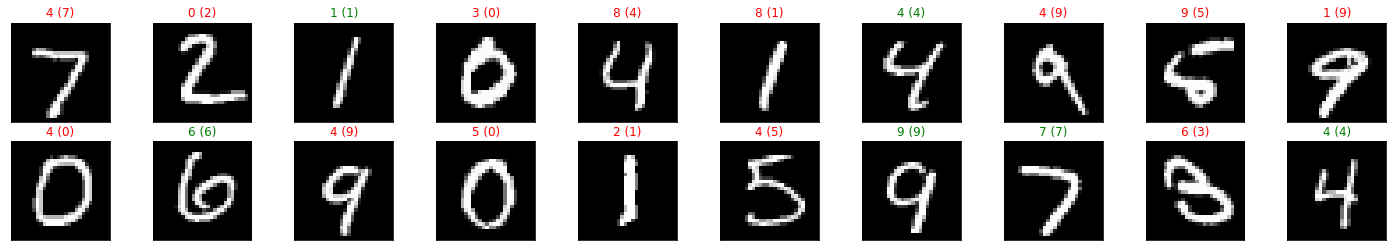

In [0]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))
  